# Pemahaman Data (Data Understanding)

## 1. Deskripsi Dataset
Dataset yang digunakan dalam penelitian ini merupakan data pasien yang terdiri atas 20.000 entri. Setiap entri merepresentasikan informasi medis dari seorang pasien, dengan tujuan untuk mengidentifikasi apakah pasien tersebut mengidap penyakit Tuberculosis (TBC) atau tidak (Normal).

Dataset ini memiliki 15 kolom, termasuk 14 fitur (variabel input) dan 1 kolom target (`Class`). Berikut adalah beberapa fitur penting dalam dataset:

- `Age`: Usia pasien
- `Gender`: Jenis kelamin
- `Chest_Pain`: Keluhan nyeri dada
- `Cough_Severity`: Tingkat keparahan batuk (skala numerik)
- `Breathlessness`: Tingkat sesak napas (skala numerik)
- `Fatigue`: Tingkat kelelahan (skala numerik)
- `Weight_Loss`: Penurunan berat badan (dalam satuan kg)
- `Fever`: Tingkat demam (Mild, Moderate, High)
- `Night_Sweats`: Keluhan berkeringat di malam hari
- `Sputum_Production`: Produksi dahak (Rendah, Sedang, Tinggi)
- `Blood_in_Sputum`: Adanya darah dalam dahak
- `Smoking_History`: Riwayat merokok
- `Previous_TB_History`: Riwayat pernah mengidap TBC sebelumnya
- `Class`: Label target, terdiri dari dua kelas yaitu `Normal` dan `Tuberculosis`

## 2. Struktur dan Dimensi Dataset
Dataset ini terdiri dari 20.000 baris dan 15 kolom. Tidak terdapat data yang hilang (missing value) pada seluruh kolom, sehingga proses imputasi tidak diperlukan.

## 3. Distribusi Kelas
Distribusi data pada kolom `Class` menunjukkan bahwa jumlah data kelas `Normal` sebanyak 14.082 entri (70,4%), sedangkan kelas `Tuberculosis` sebanyak 5.918 entri (29,6%). Ini menunjukkan adanya ketidakseimbangan kelas (class imbalance) yang perlu ditangani pada tahap preprocessing agar model tidak bias terhadap kelas mayoritas.

## 4. Tipe Data
Terdapat kombinasi tipe data numerik dan kategorikal. Kolom numerik seperti `Age`, `Cough_Severity`, `Breathlessness`, `Fatigue`, dan `Weight_Loss` akan memerlukan proses normalisasi. Sementara itu, kolom kategorikal seperti `Gender`, `Fever`, dan `Smoking_History` akan dikonversi menggunakan teknik encoding.

## 5. Statistik Deskriptif
Secara umum, nilai-nilai pada fitur numerik memiliki rentang yang berbeda-beda. Misalnya, usia pasien berkisar antara 18 hingga 89 tahun, sementara tingkat keparahan batuk dan kelelahan memiliki skala 0–9. Penyesuaian skala dengan StandardScaler atau metode serupa diperlukan agar model tidak bias terhadap fitur dengan rentang nilai besar.

## 6. Visualisasi Data
Visualisasi awal seperti distribusi kelas dan heatmap korelasi antar fitur numerik digunakan untuk memahami pola umum dalam data. Korelasi yang tinggi antar fitur bisa menjadi indikasi redundansi, yang dapat dipertimbangkan untuk reduksi dimensi pada tahap selanjutnya.

## 7. Kesimpulan Awal
Dari hasil pemahaman data, dapat disimpulkan bahwa dataset ini cukup bersih dan kaya akan fitur yang relevan. Namun, perlu dilakukan penanganan terhadap ketidakseimbangan kelas dan penyesuaian data kategorikal serta numerik sebelum dilakukan pelatihan model.

Langkah selanjutnya adalah melakukan preprocessing data untuk mempersiapkannya dalam pelatihan model klasifikasi menggunakan algoritma Support Vector Machine (SVM).


---------------------------------------------------

Membaca dataset dengan pandas dan menampilkan 5 data pertama

In [7]:
import pandas as pd

df = pd.read_csv('../data/tuberculosis_xray_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


Menampilkan 5 data terakhir

In [8]:
df.tail()

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
19995,PID019996,53,Male,No,0,4,6,11.72,Moderate,Yes,Medium,No,Never,Yes,Normal
19996,PID019997,27,Female,No,3,1,1,5.67,Moderate,Yes,Low,Yes,Current,Yes,Tuberculosis
19997,PID019998,23,Male,No,1,2,8,3.91,High,Yes,Low,Yes,Never,No,Normal
19998,PID019999,24,Female,No,8,4,6,8.77,Moderate,Yes,Medium,Yes,Never,Yes,Normal
19999,PID020000,48,Male,No,9,4,4,4.84,High,No,High,No,Never,Yes,Normal


Mengecek struktur dataset (jumlah baris dan kolom)

In [9]:
df.shape

(20000, 15)

Menampilkan informasi dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  object 
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Chest_Pain           20000 non-null  object 
 4   Cough_Severity       20000 non-null  int64  
 5   Breathlessness       20000 non-null  int64  
 6   Fatigue              20000 non-null  int64  
 7   Weight_Loss          20000 non-null  float64
 8   Fever                20000 non-null  object 
 9   Night_Sweats         20000 non-null  object 
 10  Sputum_Production    20000 non-null  object 
 11  Blood_in_Sputum      20000 non-null  object 
 12  Smoking_History      20000 non-null  object 
 13  Previous_TB_History  20000 non-null  object 
 14  Class                20000 non-null  object 
dtypes: float64(1), int64(4), object(10)


Mengecek perbandingan jumlah kelas Tuberculosis dan Normal pada kolom `Class`

In [11]:
df['Class'].value_counts()

Class
Normal          14082
Tuberculosis     5918
Name: count, dtype: int64

Statistika deskriptif

In [12]:
df.describe()

,Age,Cough_Severity,Breathlessness,Fatigue,Weight_Loss
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,53.467450,4.491350,2.003450,4.508450,7.455280
std,20.773984,2.864723,1.417123,2.881552,4.339864
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,1.000000,2.000000,3.640000
50%,53.000000,4.000000,2.000000,5.000000,7.490000
75%,71.000000,7.000000,3.000000,7.000000,11.200000
max,89.000000,9.000000,4.000000,9.000000,15.000000


Mengecek missing value

In [13]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Chest_Pain             0
Cough_Severity         0
Breathlessness         0
Fatigue                0
Weight_Loss            0
Fever                  0
Night_Sweats           0
Sputum_Production      0
Blood_in_Sputum        0
Smoking_History        0
Previous_TB_History    0
Class                  0
dtype: int64

Visualisasi perbandingan kelas Normal dan Tuberculosis

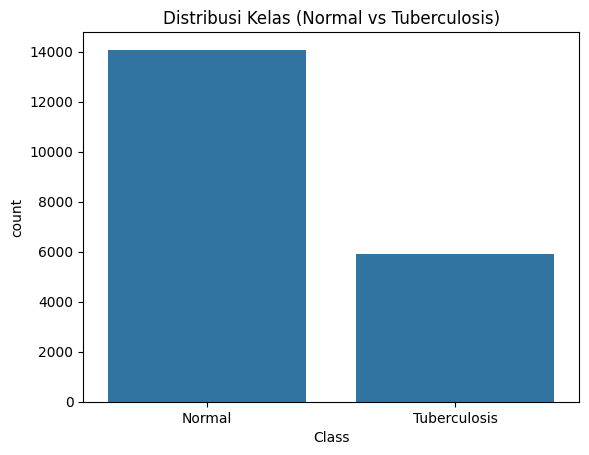

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi kelas
sns.countplot(x='Class', data=df)
plt.title('Distribusi Kelas (Normal vs Tuberculosis)')
plt.show()

Visualisasi heatmap untuk melihat korelasi antar fitur numerik

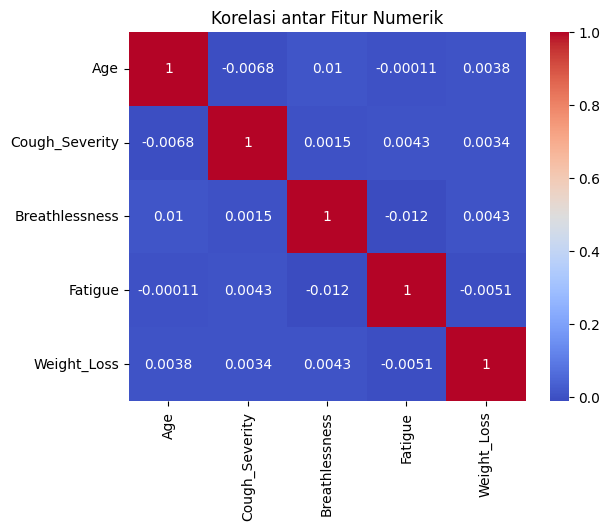

In [16]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()